<a href="https://colab.research.google.com/github/luishenriquert/pystudy/blob/main/Prioriza%C3%A7%C3%A3o_por_pontua%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt


# Carregar o dataset
uploaded = files.upload()
df = pd.read_csv('relatorio_comsaude_dados_preenchidos.csv')

# Definindo a função para calcular a pontuação de prioridade
def calcular_prioridade(row):
    pontuacao = 0
    if row['Glicemia'] > 200:  # Glicemia alta
        pontuacao += 5
    elif row['Glicemia'] > 140:  # Glicemia moderadamente alta
        pontuacao += 3

    if row['Hba1c'] > 8:  # Hba1c alto
        pontuacao += 5
    elif row['Hba1c'] > 6.5:  # Hba1c levemente elevado
        pontuacao += 3

    if row['Hipertensao? (e-Sus)'] == 1:  # Paciente com hipertensão
        pontuacao += 2

    if row['Diabetes? (e-Sus)'] == 1:  # Paciente com diabetes
        pontuacao += 2

    if row['Paciente Crítico?'] == 1:  # Paciente crítico
        pontuacao += 4

    return pontuacao

# Aplicando a função para calcular a pontuação de prioridade
df['Pontuacao_prioridade'] = df.apply(calcular_prioridade, axis=1)

# Classificando os pacientes com base na pontuação
df_sorted = df.sort_values(by='Pontuacao_prioridade', ascending=False)

# Exibindo os pacientes com maior prioridade
print(df_sorted[['ID', 'Glicemia', 'Hba1c', 'Pontuacao_prioridade']].head(10))  # Mostrando os 10 pacientes com maior prioridade


Saving relatorio_comsaude_dados_preenchidos.csv to relatorio_comsaude_dados_preenchidos (2).csv
           ID  Glicemia  Hba1c  Pontuacao_prioridade
9544   973120     303.0   12.2                    18
8043   414016     398.0   15.5                    18
11369  444172     367.0   14.4                    18
3854   330991     367.0   14.4                    18
2207   430288     321.0   12.8                    18
2362   935718     324.0   12.9                    18
5370   376612     335.0   13.3                    18
11323  768555     332.0   13.2                    18
9754   473743     298.0   12.0                    18
3656   748798     324.0   12.9                    16


Interpretação:


*   Urgência Clínica: Este conjunto de pacientes deve ser monitorado e atendido rapidamente para prevenir complicações graves relacionadas ao diabetes, como doenças cardiovasculares, neuropatia, e outras condições associadas ao controle glicêmico inadequado.
*   Prioridade para Intervenção: A alta pontuação de prioridade sugere que intervenções imediatas devem ser realizadas, como a revisão do plano de tratamento, alterações na medicação, ou consultas de emergência para avaliação clínica mais aprofundada.



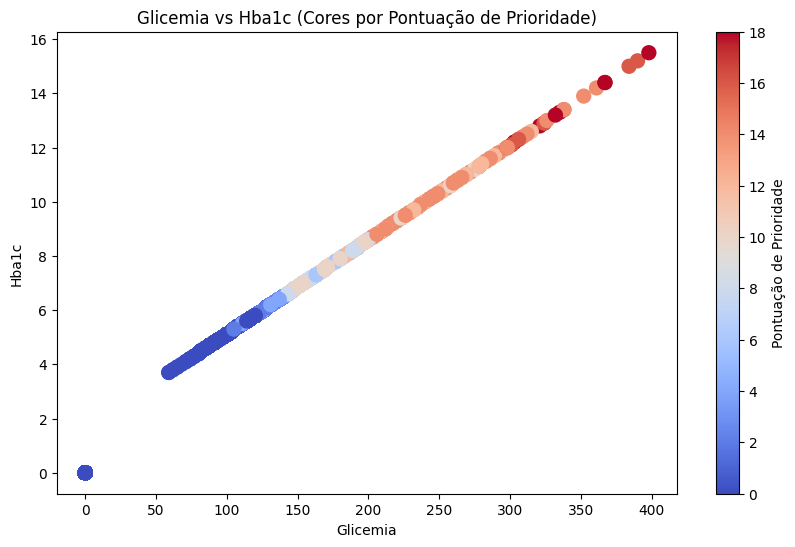

In [ ]:

# Utilizando os dados reais do DataFrame (df)
glicemia = df['Glicemia']
hba1c = df['Hba1c']
pontuacao_prioridade = df['Pontuacao_prioridade']

# Criando o scatter plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(glicemia, hba1c, c=pontuacao_prioridade, cmap='coolwarm', s=100)
plt.colorbar(scatter, label='Pontuação de Prioridade')
plt.title('Glicemia vs Hba1c (Cores por Pontuação de Prioridade)')
plt.xlabel('Glicemia')
plt.ylabel('Hba1c')
plt.grid(False)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Variáveis independentes (features) e dependente (target)
X = df[['Glicemia', 'Hba1c', 'Hipertensao? (e-Sus)', 'Diabetes? (e-Sus)']]  # Features
y = df['Paciente Crítico?']  # Target

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
log_model = LogisticRegression()

# Treinar o modelo
log_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = log_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir os resultados
print(f'Acurácia do Modelo: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia do Modelo: 1.00
Matriz de Confusão:
[[3771    2]
 [   2    8]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3773
         1.0       0.80      0.80      0.80        10

    accuracy                           1.00      3783
   macro avg       0.90      0.90      0.90      3783
weighted avg       1.00      1.00      1.00      3783

